# This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

In [41]:
import pandas as pd
import numpy as np
import operator
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

## Data Wrangling - Presenting the Data
### Reading the data

In [42]:
df=pd.read_csv('tmdb-movies.csv')

In [43]:
df.shape

(10866, 21)

In [44]:
df.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

### this data set contains 10866 row and 21 column

## Cleaning data

dropping irrelavent columns

In [45]:
df=df.drop(columns=['id','imdb_id','homepage','overview','tagline','budget_adj','revenue_adj'])

In [46]:
df = df[df['genres'].isnull() == False]
df = df[df['cast'].isnull() == False]

In [47]:
df = df[df.budget != 0]
df = df[df.revenue != 0]

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3851 entries, 0 to 10848
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            3851 non-null   float64
 1   budget                3851 non-null   int64  
 2   revenue               3851 non-null   int64  
 3   original_title        3851 non-null   object 
 4   cast                  3851 non-null   object 
 5   director              3850 non-null   object 
 6   keywords              3714 non-null   object 
 7   runtime               3851 non-null   int64  
 8   genres                3851 non-null   object 
 9   production_companies  3807 non-null   object 
 10  release_date          3851 non-null   object 
 11  vote_count            3851 non-null   int64  
 12  vote_average          3851 non-null   float64
 13  release_year          3851 non-null   int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 451.3+ KB


## Descriptive Statistics 

In [49]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,3851.000000,3.851000e+03,3.851000e+03,3851.000000,3851.000000,3851.000000,3851.000000
mean,1.192507,3.723839e+07,1.077619e+08,109.224357,528.144118,6.168294,2001.262270
std,1.475367,4.220955e+07,1.765869e+08,19.923400,880.170237,0.794736,11.284113
min,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000
25%,0.463246,1.000000e+07,1.361474e+07,95.000000,71.000000,5.700000,1995.000000
50%,0.798104,2.400000e+07,4.486219e+07,106.000000,204.000000,6.200000,2004.000000
75%,1.371352,5.000000e+07,1.242887e+08,119.000000,580.500000,6.700000,2010.000000
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000


## Exploratory Data Analysis

### Q1. actors with the most appearances in films

In [50]:
actor_dict = {}
actors=df['cast']
actors=actors.str.split('|')
actors=np.array(actors)
for actList in actors:
    for act in actList:
        act=act.lstrip()
        if act not in actor_dict:
            actor_dict[act]=1 
        else:
            actor_dict[act]+=1


In [51]:
sorted_actor_dict = sorted(actor_dict.items(), key = operator.itemgetter(1), reverse = True)
x_axis=list()
y_axis=list()
for item in sorted_actor_dict[0:20]:
    x_axis.append(item[0])
    y_axis.append(item[1])

Text(0, 0.5, 'number of appearances')

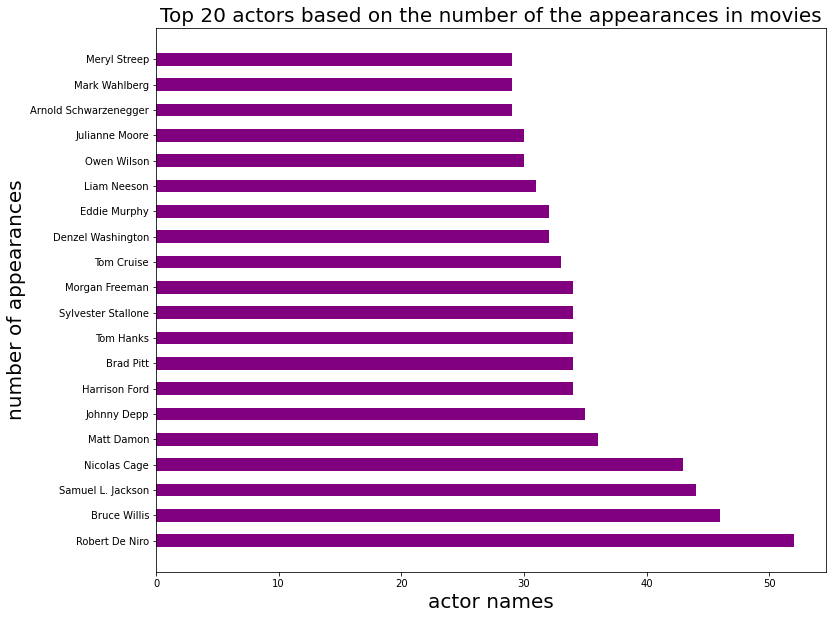

In [52]:
fig = plt.figure(figsize = (12, 10))
actor=plt.barh(x_axis,y_axis,0.5,color='purple',label='actor')
plt.title('Top 20 actors based on the number of the appearances in movies',fontsize=20)
plt.xlabel('actor names',fontsize=20)
plt.ylabel('number of appearances',fontsize=20)

## Q2 Movies which had most and least profit


In [54]:
df['profit']=df['revenue']-df['budget']

In [55]:
df.head(2)

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,228436354


In [56]:
def calculate(column):
    #for highest earned profit
    high= df[column].idxmax()
    high_details=pd.DataFrame(df.loc[high])
    
    #for lowest earned profit
    low= df[column].idxmin()
    low_details=pd.DataFrame(df.loc[low])
    
    #collectin data in one place
    info=pd.concat([high_details, low_details], axis=1)
    
    return info

#calling the function
calculate('profit')

,1386,2244
popularity,9.432768,0.25054
budget,237000000,425000000
revenue,2781505847,11087569
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
keywords,culture clash|future|space war|space colony|so...,assassin|small town|revenge|deception|super speed
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Boram Entertainment Inc.


Column with id 1386 shows the highest earned profit i.e 2544505847 .

Whereas the column with id 2244 shows the lowest earned profit i.e -413912431

## Q3. Movies with largest and lowest budgets

In [57]:
calculate('budget')

,2244,2618
popularity,0.25054,0.090186
budget,425000000,1
revenue,11087569,100
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
keywords,assassin|small town|revenge|deception|super speed,restaurant|neighbor|dog|ring
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
production_companies,Boram Entertainment Inc.,Alcon Entertainment|Dinamo Entertainment


Column with id 2244 shows the largest budget i.e 425000000 dollar.

Whereas the column with id 2618 shows the smallest budget i.e 1 dollar

## Q4. Movies with most and least earned revenue

In [58]:
calculate('revenue')

,1386,5067
popularity,9.432768,0.462609
budget,237000000,6000000
revenue,2781505847,2
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
keywords,culture clash|future|space war|space colony|so...,NaN
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Lions Gate Films|Cruise/Wagner Productions|Bau...


Column with id 1386 shows the largest revenue earned i.e 2781505847 dollar.

Whereas the column with id 5067 shows the smallest revenue earned i.e 2 dollar

## Q5.Movies with longest and shortest runtime

In [59]:
calculate('runtime')

,2107,5162
popularity,0.534192,0.208637
budget,18000000,10
revenue,871279,5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
keywords,gun|car bomb|tv mini-series|terrorism|opec,NaN
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
production_companies,Egoli Tossell Film AG|Canal+|Arte France|Films...,Studio 4Â°C


Column with id 2107 shows the longest runtime i.e 338 minutes.

Whereas the column with id 5162 shows the shortest runtime i.e 15 minutes

## Q6.Average runtime of the movies

In [60]:
df['runtime'].mean()

109.22435730978967

so we have the Average runtime of the movies is 109 minute 

lets visualize it 

Text(0, 0.5, 'n of movies')

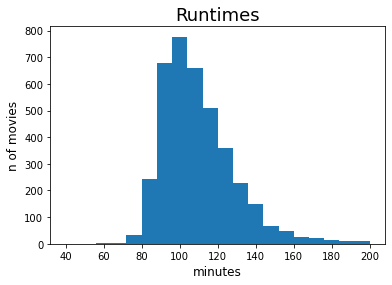

In [61]:
plt.hist(df['runtime'],range=(40,200),bins=20)
plt.title('Runtimes',fontsize=18)
plt.xlabel('minutes',fontsize=12)
plt.ylabel('n of movies',fontsize=12)

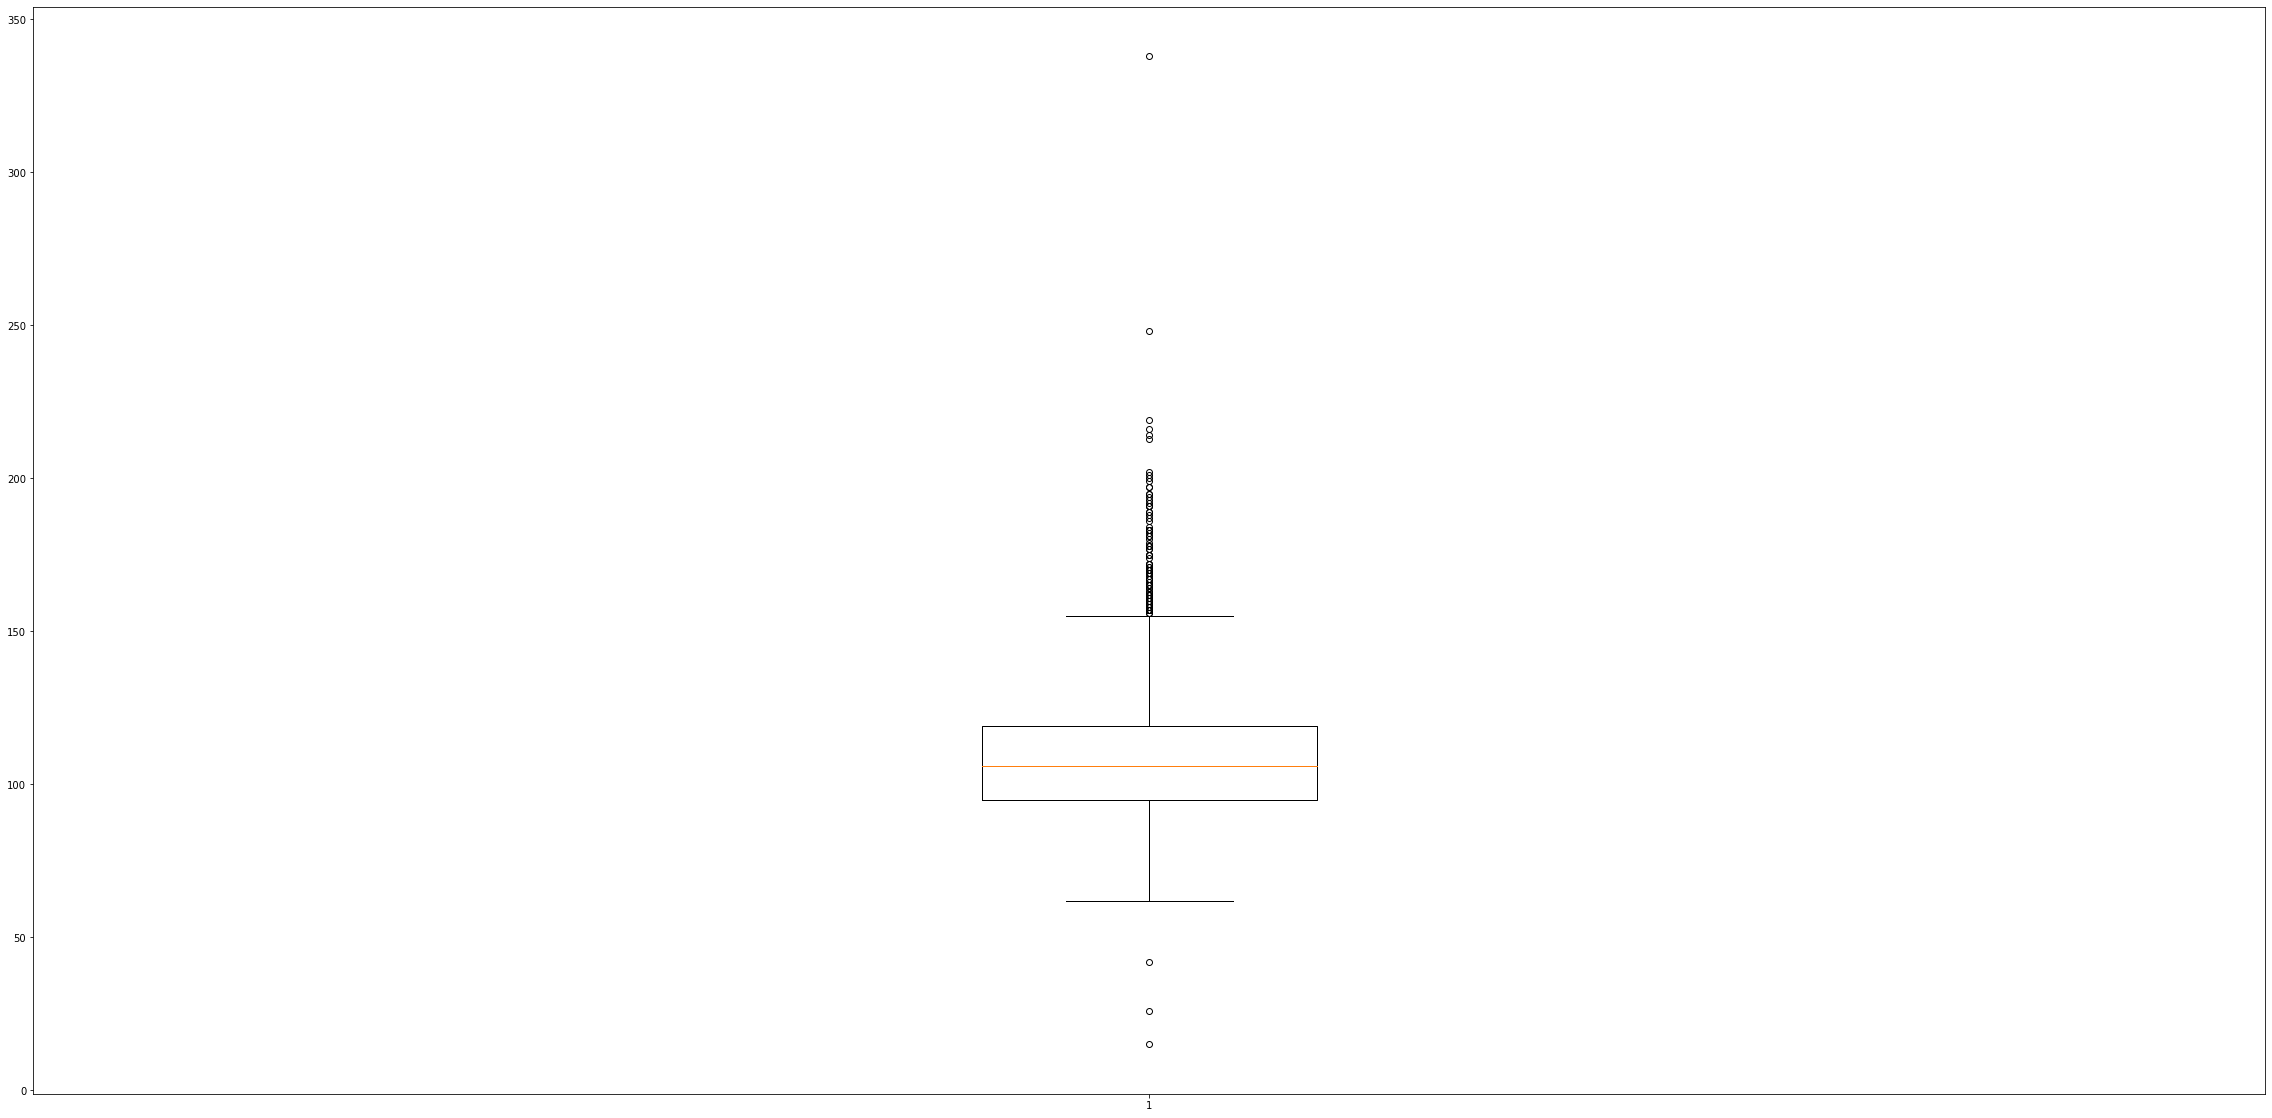

In [62]:
fig = plt.figure(figsize = (40, 20))
plt.boxplot(df['runtime']);

In [63]:
df['runtime'].describe()

count    3851.000000
mean      109.224357
std        19.923400
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

from the two figuers we can deduce that 

1. (25% of movies have a runtime of less than 95 minutes)

  2. (50% of movies have a runtime of less than 109 minutes. (median))

  3. (75% of movies have a runtime of less than 119 minutes)

## Q7.Year of release vs Profitability

In [76]:
profit_year_totals=df.groupby('release_year').sum()['profit']
profit_year_count=df.groupby('release_year').count()['profit']

In [77]:
prop=profit_year_totals/profit_year_count

Text(0, 0.5, 'profits')

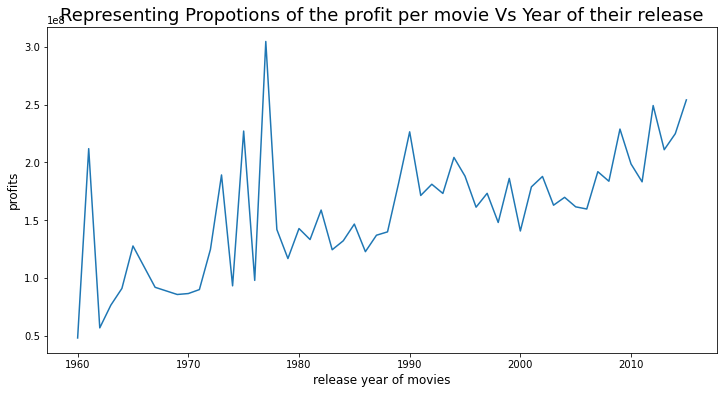

In [78]:
fig = plt.figure(figsize = (12, 6))
plt.plot(prop)
plt.title('Representing Propotions of the profit per movie Vs Year of their release',fontsize=18)
plt.xlabel('release year of movies',fontsize=12)
plt.ylabel('profits',fontsize=12)

In [79]:
prop.idxmax()

1977

from the figure above we can say that 1977 was the most profitable year

## Q8.Succesful Genres

to work for this target we need to reduce our data set so we will study the movies which gained more than 45 million 

In [68]:
df=df[df['profit']>=45000000]

In [69]:
df.head(3)

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,228436354
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,185238201


In [70]:
genres_dict = {}
gens=df['genres']
gens=gens.str.split('|')
gens=np.array(gens)
for genList in gens:
    for gen in genList:
        if gen not in genres_dict:
            genres_dict[gen]=1 
        else:
            genres_dict[gen]+=1


In [71]:
sorted_gen_dict = sorted(genres_dict.items(), key = operator.itemgetter(1), reverse = True)
x_axis=list()
y_axis=list()
for item in sorted_gen_dict[0:20]:
    y_axis.append(item[0])
    x_axis.append(item[1])

Text(0, 0.5, 'number of appearances')

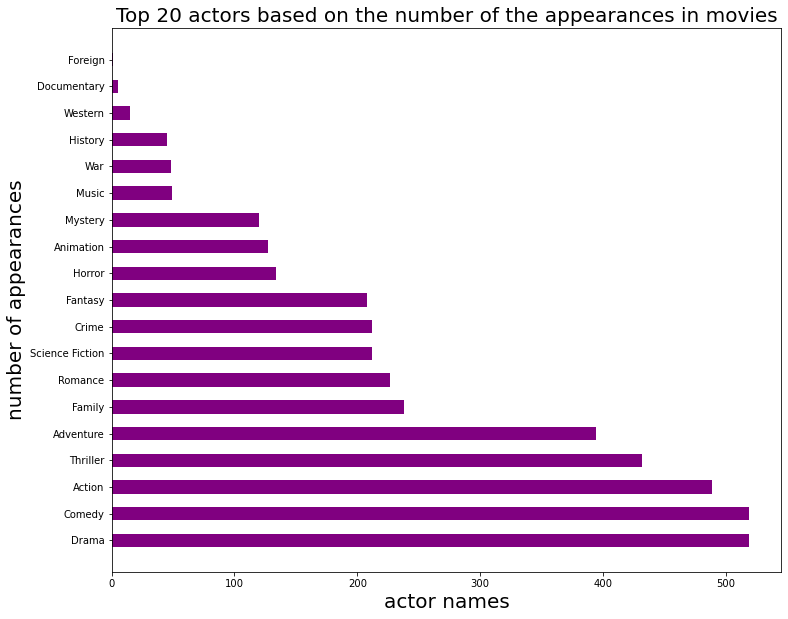

In [72]:
fig = plt.figure(figsize = (12, 10))
genre=plt.barh(y_axis,x_axis,0.5,color='purple',label='actor')
plt.title('Top 20 actors based on the number of the appearances in movies',fontsize=20)
plt.xlabel('actor names',fontsize=20)
plt.ylabel('number of appearances',fontsize=20)

## Q9.Average Budget of the movies

In [73]:
df['budget'].mean()

58754889.933192685

So the movies having profit of 45 million dollar and more have an average budget of 60 million dollar.

## Q.10 Average runtime of the movies 

Text(0, 0.5, 'n of movies')

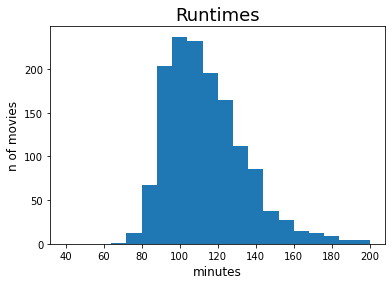

In [74]:
plt.hist(df['runtime'],range=(40,200),bins=20)
plt.title('Runtimes',fontsize=18)
plt.xlabel('minutes',fontsize=12)
plt.ylabel('n of movies',fontsize=12)

In [75]:
df['runtime'].mean()

113.34317862165963

So the movies having profit of 45 million dollar and more have an average runtime of 113 minute.

## Conclusion

Robert De Niro is the actor with the most appearance of total 52 time 

The Warrior's Way has lost 5999998 dollar as least profit movie 

Avatar has gained 2544505847 dollar as the most profit movie

1977 was the most profitable year

Action, Comedy and Drama are the most profitable geners

movies having profit of 45 million dollar and more have an average budget of 60 million dollar.

movies having profit of 45 million dollar and more have an average runtime of 113 minute.